#####  https://school.geekwall.in/p/rJK_T1qZQ/time-series-prediction-with-arima-models-in-python

## https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %inline matplotlib
os.chdir(r"C:\Users\MANDY\Desktop\dataset")
data = pd.read_csv("train_csv (1).csv",index_col=['time'], parse_dates=['time'])
data.drop('id', axis = 1, inplace= True)
data.index = pd.to_datetime(data.index)

In [2]:
data = pd.read_csv("train_csv (1).csv",index_col=['time'], parse_dates=['time'])

In [3]:
data.drop('id', axis = 1, inplace= True)

In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2019-03-19 00:00:00 to 2019-03-19 00:13:10
Data columns (total 1 columns):
feature    80 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


In [15]:
#y_pred = df['feature']

In [16]:
data.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


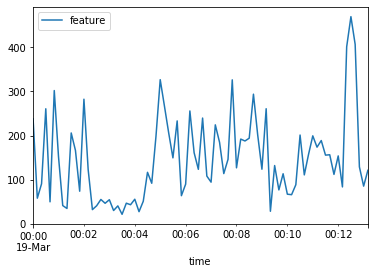

In [6]:
data.plot()

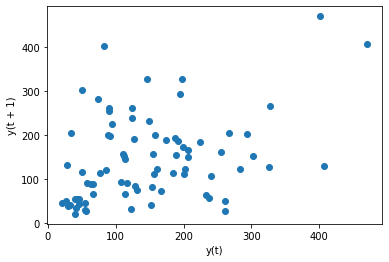

In [7]:
from pandas.plotting import lag_plot
lag_plot(data)

In [21]:
data.corr()

,feature
feature,1.0


In [28]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
values = DataFrame(data.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.377782
t+1  0.377782  1.000000


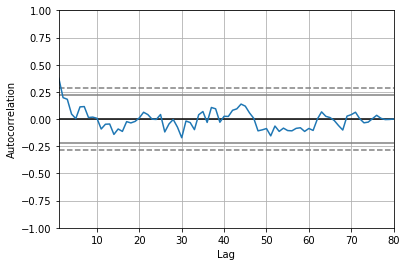

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
pyplot.show()

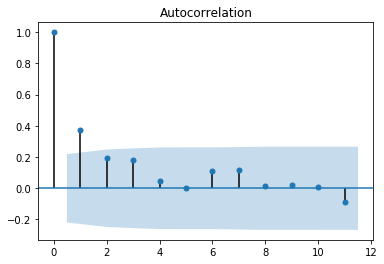

In [45]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data, lags=11)
pyplot.show()

In [54]:
from statsmodels.tsa.ar_model import AR

#create train/test datasets
X = data['feature'].dropna()
# train_data = X[1:len(X)-12]
# test_data = X[X[len(X)-12:]]

#train the autoregression model
model = AR(data)
model_fitted = model.fit()
print('The lag value chose is: %s' % model_fitted.k_ar)
print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 11
The coefficients of the model are:
 const          77.656768
L1.feature      0.439121
L2.feature      0.039729
L3.feature      0.122360
L4.feature     -0.097442
L5.feature     -0.117990
L6.feature      0.103138
L7.feature      0.181135
L8.feature      0.026837
L9.feature     -0.056129
L10.feature    -0.051665
L11.feature    -0.121110
dtype: float64


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


Test MSE: 27863.874


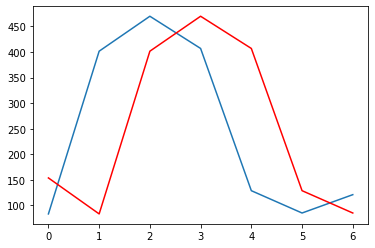

In [58]:
values = DataFrame(data.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [36]:
df1 = pd.read_csv("test_csv (1).csv",index_col=['time'], parse_dates=['time'])

Lag: 11
Coefficients: [ 5.93521705e+01  4.18669354e-01  2.12093110e-01  2.95270801e-01
 -2.23290202e-01 -2.54409253e-01  1.18721610e-01  1.99489568e-01
  1.04995030e-01 -1.09437271e-01 -1.03334858e-01 -3.93898967e-02]
predicted=326.607630, expected=406.790000
predicted=370.848355, expected=128.910000
predicted=325.343388, expected=85.280000
predicted=175.360084, expected=121.120000
Test MSE: 31383.949


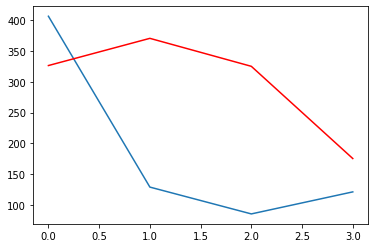

In [59]:
X = data.values
train, test = X[1:len(X)-4], X[len(X)-4:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [39]:
from statsmodels.tsa.ar_model import AR
model = AR(data)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
coef

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


const          77.656768
L1.feature      0.439121
L2.feature      0.039729
L3.feature      0.122360
L4.feature     -0.097442
L5.feature     -0.117990
L6.feature      0.103138
L7.feature      0.181135
L8.feature      0.026837
L9.feature     -0.056129
L10.feature    -0.051665
L11.feature    -0.121110
dtype: float64

In [37]:
df1.index = pd.to_datetime(df1.index)
df1.head()

,id
time,
2019-03-19 00:13:20,80
2019-03-19 00:13:30,81
2019-03-19 00:13:40,82
2019-03-19 00:13:50,83
2019-03-19 00:14:00,84


In [ ]:
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in df1:
	yhat = model_persistence(x)
	predictions.append(yhat)